In [17]:
#FIUBA - 75.26 Simulacion
#2C 2019 - Trabajo final
#79979 - Gonzalez, Juan Manuel (juanmg0511@gmail.com)

#A pseudo-random numbers generator based on a novel 3D chaotic map with an application to color image encryption
#https://doi.org/10.1007/s11071-018-4390-z
#3D piecewise-logistic map
#3D-PLM

#Importación modulos y librerias
import matplotlib.pyplot as plt
import math, random, scipy.stats, statistics
import numpy as np

#Definición de parámetros de control: c1, c2, reales
#Como define el paper, c1=c2=20
c1 = 20
c2 = 20

#Implementación de funciones auxiliares
#Picewise map
def pMap(x):
    "piecewise map: funcion que dado x y un parametro de control real c1, calcula Ψ(x)"
    return (abs(1 - (c1 * x)))

#Logistic map
def lMap(x, y):
    "2D logistic map: funcion que dados x e y, y un parametro de control real c2, calcula Λ(x, y)"
    return (c2 * x * (1 - y))

#Implemantación del 3D piecewise-logistic map (3D-PLM), T
def tMap(x, y, z):
    "3D piecewise-logistic map: funcion que dados x, y, z, los paráetros de control reales c1 y c2, calcula T(x, y, z)"    
    x = (pMap(x) + lMap(y, z)) % 1
    y = (pMap(y) + lMap(z, x)) % 1
    z = (pMap(z) + lMap(x, y)) % 1
    
    return x, y, z

In [67]:
#Funcion que genera una secuencia de numeros en x,y,z
def generar_secuencia(x0, y0, z0, nt):

    secuencia = []
    for i in range(nt):
    
        if i == 0:
            secuencia.append(tMap(x0, y0, z0))
        else:
            secuencia.append(tMap(secuencia[i-1][0], secuencia[i-1][1], secuencia[i-1][2]))
        
    Sx = [x[0] for x in secuencia]
    Sy = [y[1] for y in secuencia]
    Sz = [z[2] for z in secuencia]
    
    return Sx, Sy, Sz

In [68]:
#Generación de las primeras 10^6 coordenadas de la secuencia
#x0,y0,z0, las "claves secretas", pertenecen al intervalo [0,1]
x0 = 0.411
y0 = 0.321
z0 = 0.631

nt = 10**6

Sx, Sy, Sz = generar_secuencia(x0, y0, z0, nt)

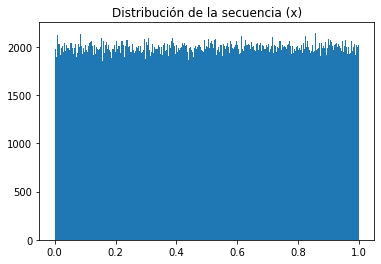

In [69]:
#Graficamos los histogramas de x, y, z
#X
(Nx, Binsx, Patchesx) = plt.hist(Sx,500)
plt.title("Distribución de la secuencia (x)")
plt.show()

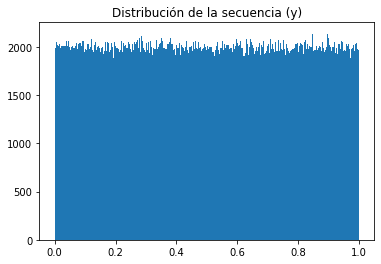

In [70]:
#Y
(Ny, Binsy, Patchesy) = plt.hist(Sy,500)
plt.title("Distribución de la secuencia (y)")

plt.show()

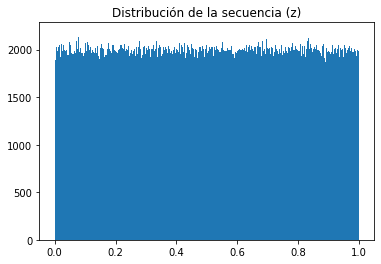

In [71]:
#Z
(Nz, Binsz, Patchesz) = plt.hist(Sz,500)
plt.title("Distribución de la secuencia (z)")

plt.show()

In [72]:
#The Null hypothesis used here assumes that the numbers follow the normal distribution.
#If the p-value is < alpha, we reject the Null hypothesis.

#Test Chi^2
print(scipy.stats.chisquare(Nx, ddof=0, axis=0))
print(scipy.stats.chisquare(Ny, ddof=0, axis=0))
print(scipy.stats.chisquare(Nz, ddof=0, axis=0))

Power_divergenceResult(statistic=530.9259999999999, pvalue=0.15605317992454973)
Power_divergenceResult(statistic=501.3399999999999, pvalue=0.4621364821672876)
Power_divergenceResult(statistic=509.827, pvalue=0.35892190538483393)


In [73]:
#Test de Kolmogorov-Smirnov
print(scipy.stats.kstest(Sx, 'uniform', args=(0, 1)))
print(scipy.stats.kstest(Sy, 'uniform', args=(0, 1)))
print(scipy.stats.kstest(Sz, 'uniform', args=(0, 1)))

KstestResult(statistic=0.0007719992589236835, pvalue=0.590294481508213)
KstestResult(statistic=0.0013428971082109498, pvalue=0.054278987526916976)
KstestResult(statistic=0.0007777986135670822, pvalue=0.5806490104245855)


In [75]:
#Test runs
#Z-statistic vs Z-critical 
#Z-critical = 1.96 for confidence level of 95% 
#The null hypothesis is rejected i.e. the numbers are declared not to be random, if |Z|>Z-critical 
def runsTest(l, l_median): 
  
    runs, n1, n2 = 0, 0, 0
    for i in range(len(l)): 
          
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median): 
            runs += 1  
          
        if(l[i]) >= l_median: 
            n1 += 1             
        else: 
            n2 += 1   
  
    runs_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
  
    z = (runs-runs_exp)/stan_dev 
  
    return z 
          
Sx_m = statistics.median(Sx) 
Sy_m = statistics.median(Sy) 
Sz_m = statistics.median(Sz) 

Zx = abs(runsTest(Sx, Sx_m)) 
Zy = abs(runsTest(Sy, Sy_m)) 
Zz = abs(runsTest(Sz, Sz_m)) 

print("Zx: " + str(Zx))
print("Zy: " + str(Zy))
print("Zz: " + str(Zz))

Zx: 1.5380007690013457
Zy: 0.5460002730004778
Zz: 1.2620006310011043


In [85]:
# Test Gap
def gap_test(muestra, alfa, beta):

    #calculo las probabilidades, corto cuando ya no distingo diferencia
    esperados = [beta - alfa]
    termino = False
    i = 1
    while not termino:
        nuevaProb = esperados[0] * ((1 - esperados[0]) ** i)

        if nuevaProb == esperados[i - 1]:
            termino = True
        else:
            esperados.append(nuevaProb)
            i += 1

    # calculo cantidad de veces que cai 0 afuera, 1 afuera, 2 afuera...
    primero = True
    contador_veces_cae_afuera = 0
    veces_cae_afuera = {}
    for x in muestra:
        if (x >= alfa and x <= beta) and primero:
            primero = False
        if (x >= alfa and x <= beta) and not primero:
            veces = veces_cae_afuera.get(contador_veces_cae_afuera, 0)
            veces_cae_afuera[contador_veces_cae_afuera] = veces + 1
            contador_veces_cae_afuera = 0
        if (x < alfa or x > beta) and not primero:
            contador_veces_cae_afuera += 1

    # ajusto para que sean frecuencias
    total = sum(veces_cae_afuera.values())
    for k in veces_cae_afuera.keys():
        veces_cae_afuera[k] /= total

    # lo paso a lista y relleno con 0 donde no tuve apariciones
    observados = []
    for i in range(len(esperados)):
        observados.append(veces_cae_afuera.get(i, 0))

    dsquared, p = scipy.stats.chisquare(observados, esperados)

    return dsquared, p


#Ejecutamos el test
alfa = 0.3
beta = 0.6

dsquaredx, px = gap_test(Sx, alfa, beta)
dsquaredy, py = gap_test(Sy, alfa, beta)
dsquaredz, pz = gap_test(Sz, alfa, beta)

print("D^2: " + str(dsquaredx) + " p: " + str(px))
print("D^2: " + str(dsquaredy) + " p: " + str(py))
print("D^2: " + str(dsquaredz) + " p: " + str(pz))

D^2: 0.0001383905272274718 p: 1.0
D^2: 0.00014007759239740411 p: 1.0
D^2: 0.00012236727910318676 p: 1.0


In [86]:
#Cantidad de repeticiones de cada test
rt = 10**2
#Longitud de las series a generar
nt = 10**6
#Alfa y beta para el gap test
alfa = 0.3
beta = 0.6
#Semilla para random de NumPy
np.random.seed(79979)

chi2 = []
ks   = []
runs = []
gap  = []

for i in range(rt):
    
    print("*******--- SECUENCIA: " + str(i) + " ---*******")
    
    x0, y0, z0 = np.random.random(3)
    Sx, Sy, Sz = generar_secuencia(x0, y0, z0, nt)
    (Nx, Binsx) = np.histogram(Sx, 500)
    (Ny, Binsy) = np.histogram(Sy, 500)
    (Nz, Binsz) = np.histogram(Sz, 500)
    
    Sx_m = statistics.median(Sx) 
    Sy_m = statistics.median(Sy) 
    Sz_m = statistics.median(Sz) 
    
    print(scipy.stats.chisquare(Nx, ddof=0, axis=0))
    print(scipy.stats.chisquare(Ny, ddof=0, axis=0))
    print(scipy.stats.chisquare(Nz, ddof=0, axis=0))
    
    print(scipy.stats.kstest(Sx, 'uniform', args=(0, 1)))
    print(scipy.stats.kstest(Sy, 'uniform', args=(0, 1)))
    print(scipy.stats.kstest(Sz, 'uniform', args=(0, 1)))
    
    Zx = abs(runsTest(Sx, Sx_m)) 
    Zy = abs(runsTest(Sy, Sy_m)) 
    Zz = abs(runsTest(Sz, Sz_m)) 
    
    print("Rx: " + str(Zx))
    print("Ry: " + str(Zy))
    print("Rz: " + str(Zz))
    
    dsquaredx, px = gap_test(Sx, alfa, beta)
    dsquaredy, py = gap_test(Sy, alfa, beta)
    dsquaredz, pz = gap_test(Sz, alfa, beta)
    
    print("D^2: " + str(dsquaredx) + " p: " + str(px))
    print("D^2: " + str(dsquaredy) + " p: " + str(py))
    print("D^2: " + str(dsquaredz) + " p: " + str(pz))
    

*******--- SECUENCIA: 0 ---*******
Power_divergenceResult(statistic=528.213, pvalue=0.1766332061002271)
Power_divergenceResult(statistic=487.49, pvalue=0.6353423505800735)
Power_divergenceResult(statistic=463.38200000000006, pvalue=0.8716522334223199)
KstestResult(statistic=0.0012126385802733175, pvalue=0.10561183971015715)
KstestResult(statistic=0.0009402467535948311, pvalue=0.3396083754650985)
KstestResult(statistic=0.0007764081998149486, pvalue=0.582957990626034)
Rx: 0.6620003310005793
Rx: 0.5180002590004533
Rx: 0.7580003790006633


KeyboardInterrupt: 

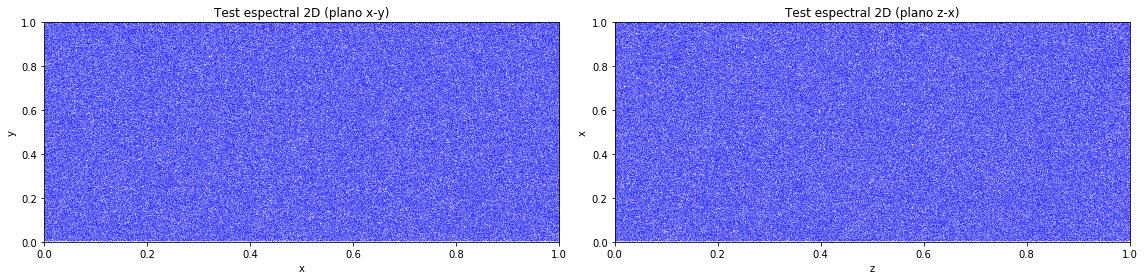

In [103]:
#Test espectral 2D - Planos x-y y z-x
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

#x-y
ax1.plot(Sx, Sy, ',b', alpha=.10)
ax1.set_xlim(0, 1)
ax1.set_xlabel("x")
ax1.set_ylim(0, 1)
ax1.set_ylabel("y")
ax1.set_title("Test espectral 2D (plano x-y)")

#z-x
ax2.plot(Sz, Sx, ',b', alpha=.10)
ax2.set_xlim(0, 1)
ax2.set_xlabel("z")
ax2.set_ylim(0, 1)
ax2.set_ylabel("x")
ax2.set_title("Test espectral 2D (plano z-x)")

plt.tight_layout()

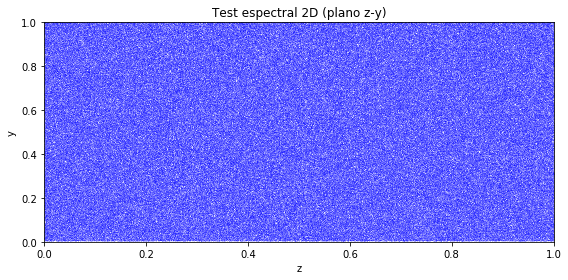

In [104]:
#Test espectral 2D - Planos x-y y z-x
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))

#z-y
ax1.plot(Sz, Sy, ',b', alpha=.10)
ax1.set_xlim(0, 1)
ax1.set_xlabel("z")
ax1.set_ylim(0, 1)
ax1.set_ylabel("y")
ax1.set_title("Test espectral 2D (plano z-y)")

plt.tight_layout()